<a href="https://colab.research.google.com/github/lephuocdat2000/DeepLearning-and-Application/blob/main/DeepVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16,decode_predictions
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import cv2
import matplotlib.pyplot as plt


In [98]:
vgg = VGG16()
vgg.build((1,244,244,3))
#Tạo model trích xuất feature map
feature_map=tf.keras.Model(inputs=vgg.inputs,outputs=vgg.layers[1].output)

In [108]:
def Prediction(path_img):
    image = load_img(path_img,target_size=(224,224,3))
    plt.imshow(image)
    img = img_to_array(image)
    batch = img.reshape(1,224,224,3)
    pred=vgg.predict(batch)
    #Trích xuất feature map
    map1=feature_map.predict(batch)
    #show
    plt.imshow(map1[0,:,:,63],cmap='gray')
    #Đưa ra 5 object có prob cao nhất
    label = decode_predictions(pred)
    label=label[0][0:5]
    print(label)

[('n02129604', 'tiger', 0.966821), ('n02123159', 'tiger_cat', 0.030944556), ('n02391049', 'zebra', 0.0010371124), ('n02128925', 'jaguar', 0.0008756363), ('n02128757', 'snow_leopard', 6.154814e-05)]


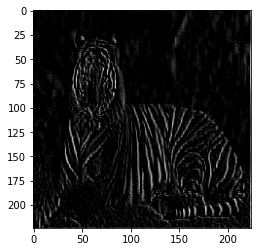

In [109]:
Prediction('/content/tiger.jpeg')

[('n02088364', 'beagle', 0.26575413), ('n02101388', 'Brittany_spaniel', 0.14240769), ('n02102040', 'English_springer', 0.12356476), ('n02124075', 'Egyptian_cat', 0.11808895), ('n02102177', 'Welsh_springer_spaniel', 0.035487957)]


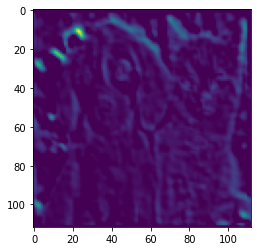

In [80]:
Prediction('/content/dog-and-cat.jpg')

[('n01871265', 'tusker', 0.47682062), ('n02092339', 'Weimaraner', 0.22690542), ('n02504013', 'Indian_elephant', 0.17517512), ('n02504458', 'African_elephant', 0.07350806), ('n02109047', 'Great_Dane', 0.02141311)]


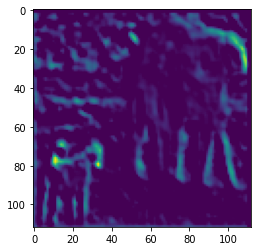

In [81]:
Prediction('/content/elephant-and-dog.jpg')